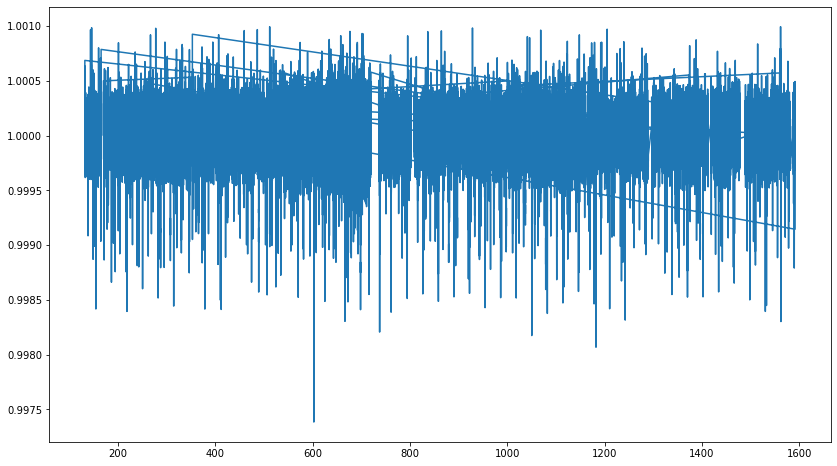

In [1]:
import numpy 
import pylab
import pandas as pd
flattened_data = numpy.loadtxt('Obj2lc.txt', delimiter=',') ## remember to give the delimiter

#remove outliers - above 1.001
flattened_data = flattened_data[flattened_data[:,1]<1.001]

pylab.figure(figsize=(14,8))
#pylab.xlim(600,800)
#pylab.ylim(0.996,1.002)

time = flattened_data[:,0]
flux = flattened_data[:, 1]
error = flattened_data[:,2]

pylab.plot(time, flux)

In [2]:
import scipy.signal
from scipy.signal import lombscargle

In [39]:
for i in range(0,len(time)-1):
    print((time[i+1]-time[i]))

In [36]:
time[1]-time[0]

0.020432952493138146

In [53]:
freqs = numpy.linspace((1/670.),(1/0.0204),20000)
lomb = scipy.signal.lombscargle(time, flux, freqs, precenter=True)

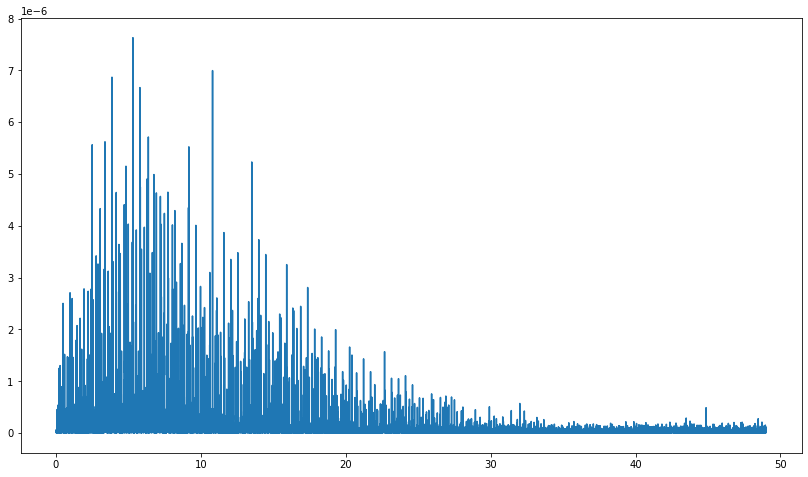

In [54]:
pylab.figure(figsize=(14,8))
pylab.plot(freqs, lomb)

In [55]:
#returns the frequency of the peak value
index_max = pd.DataFrame(lomb).idxmax()
freqs[index_max]

array([5.30551781])

In [8]:
numpy.savetxt('test_fold.csv', numpy.array([time, flux, error]).transpose(), header='#JD, mag, error', delimiter=',')

In [9]:
#folding the lightcurve 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def fold_lightcurve(filename, period, *args, **kwargs):
    obj_name = kwargs.get('obj_name', None)
    outdata = kwargs.get('output_file', 'folded_lc_data.csv')
    plotname = kwargs.get('plot_file', 'folded_lc.pdf')
    
    ## Read in the data. Should be comma separated, header row (if present) should have # at the start.
    data = pd.read_csv(filename, usecols=[0,1,2], names=('JD', 'mag', 'error'), comment='#')
    if len(data.columns) < 3:
        print("File format should be \n\
              (M)JD, magnitude, uncertainty\n")
        exit(1)
    ## Folding the lightcurve:
    ## Phase = JD/period - floor(JD/period)
    ## The floor function is there to make sure that the phase is between 0 and 1.
    
    data['Phase'] = data.apply(lambda x: ((x.JD/ period) - np.floor(x.JD / period)), axis=1)
    
      
    ## Now make the plot
    
    plt.clf()
    plt.figure(figsize=(10,5))
    
    ## concatenating the arrays to make phase -> 0 - 3
    ## This makes it easier to see if periodic lightcurves join up as expected
    
    phase_long = np.concatenate((data.Phase, data.Phase + 1.0, data.Phase + 2.0))
    mag_long = np.concatenate((data.mag, data.mag, data.mag))
    err_long = np.concatenate((data.error, data.error, data.error))
    
    plt.errorbar(phase_long, mag_long, yerr=err_long, marker='o', ls='None', zorder=4, label='_nolegend_', mec='Grey')
    ## Inverting the y axis because magnitudes
    plt.gca().invert_yaxis()
    
    plt.xlabel('Phase ($\phi$)')
    plt.ylabel('Magnitude')
    
    ## making the plot title to include object and period. 
    ## If no object name given in kwargs then title is just period
    if obj_name != None:
        namestring = str(obj_name) + ', '
    else:
        namestring = ''
    titletext = namestring + 'P = ' + str(np.around(period, decimals=4)) + 'd'
    plt.suptitle(titletext)
    
    plt.savefig(plotname)
    
    ## Printing the phased data to a csv file.
    ## If filename not given in fold_lightcurve arguments default filename is folded_lc_data.csv
    
    data.to_csv(outdata, header=True, index=False, sep=',')

    
    return data


<Figure size 432x288 with 0 Axes>

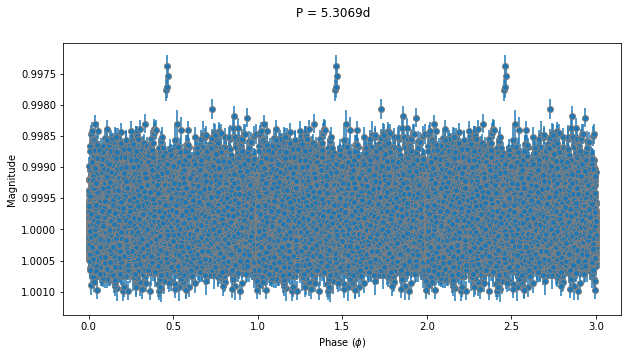

In [43]:
tmp=fold_lightcurve('test_fold.csv', 5.30686472)